In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# I am using NASDAQ stock exchange
data=yf.download("AAPL",period="5y")
df=pd.DataFrame(data)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2019-12-16,67.829849,69.964996,70.197502,69.245003,69.250000,128186000
2019-12-17,67.963150,70.102501,70.442497,69.699997,69.892502,114158400
2019-12-18,67.800774,69.934998,70.474998,69.779999,69.949997,116028400
2019-12-19,67.868607,70.004997,70.294998,69.737503,69.875000,98369200
2019-12-20,67.728050,69.860001,70.662498,69.639999,70.557503,275978000


In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-12-16 to 2024-12-16
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1259 non-null   float64
 1   (Close, AAPL)      1259 non-null   float64
 2   (High, AAPL)       1259 non-null   float64
 3   (Low, AAPL)        1259 non-null   float64
 4   (Open, AAPL)       1259 non-null   float64
 5   (Volume, AAPL)     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
None


In [64]:
#inspecting for null values
print(df.shape)
print(df.isnull().any())

(1259, 6)
Price      Ticker
Adj Close  AAPL      False
Close      AAPL      False
High       AAPL      False
Low        AAPL      False
Open       AAPL      False
Volume     AAPL      False
dtype: bool


In [65]:
# data types
print(df.dtypes)

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object


In [66]:
# Basic Statistics
print(df.describe())
# here the percentiles 25%, 50%, 75%, show the value below which a certain percentage of data points fall.

Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     150.812529   152.593964   154.132701   150.880733   152.440423   
std       41.825521    41.250811    41.400897    41.033676    41.210444   
min       54.509762    56.092499    57.125000    53.152500    57.020000   
25%      125.230061   127.889999   129.849998   126.629997   128.385002   
50%      149.892319   151.759995   153.720001   150.100006   151.449997   
75%      176.436081   177.970001   179.555000   176.419998   177.610001   
max      251.325195   251.325195   251.345001   247.649994   248.000000   

Price         Volume  
Ticker          AAPL  
count   1.259000e+03  
mean    9.114069e+07  
std     5.340242e+07  
min     1.711550e+07  
25%     5.583090e+07  
50%     7.677420e+07  
75%     1.085037e+08  
max     4.265100e+08  


In [67]:
print((df["Volume"]))

Ticker           AAPL
Date                 
2019-12-16  128186000
2019-12-17  114158400
2019-12-18  116028400
2019-12-19   98369200
2019-12-20  275978000
...               ...
2024-12-10   36914800
2024-12-11   45205800
2024-12-12   32777500
2024-12-13   33132000
2024-12-16   17115505

[1259 rows x 1 columns]


Text(0.5, 1.0, 'Closing price variation')

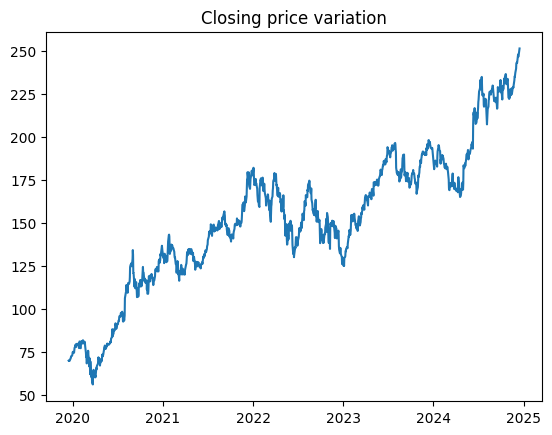

In [68]:
# plotting closing price
plt.plot(df["Close"])
plt.title("Closing price variation")

Text(0.5, 1.0, 'Volume variation with time')

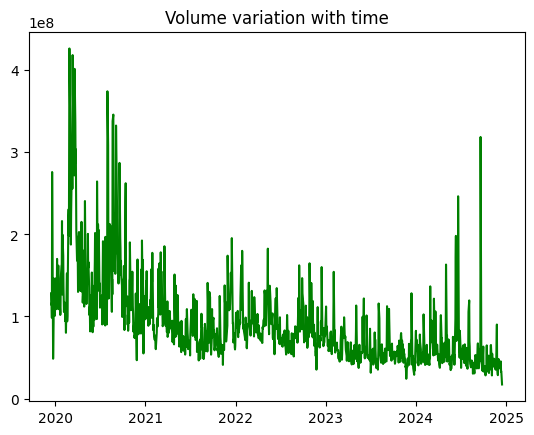

In [69]:
#Plot the trading volume over time.
plt.plot(df["Volume"],color="green")
plt.title("Volume variation with time")

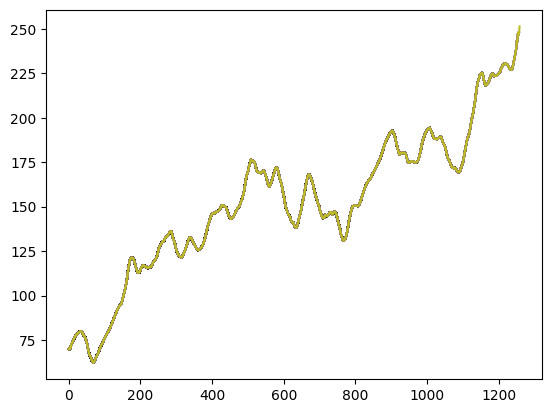

In [70]:
#Calculate and plot a 30-day moving average for the closing price.

# Moving Average:- A moving average is a statistical method used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.
# numpy implementation
close=np.array(df["Close"])
arr=[]
for i in range(1259):
  if i<10:
    arr=arr+[close[i]]
  elif i>1249:
    arr=arr+[close[i]]
  else:
    i=i-10
    sum=0
    for j in range(20):
      sum=sum+close[i+j]
    sum=sum/20
    arr=arr+[sum]
  plt.plot(arr)

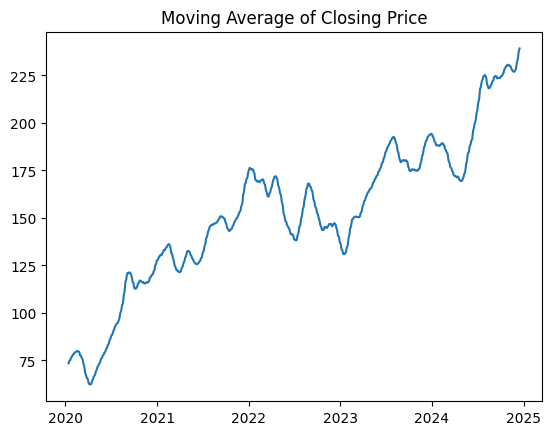

In [71]:
#Calculate and plot a 30-day moving average for the closing price.

# Moving Average:- A moving average is a statistical method used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.
# pandas implementation

df['AVG'] = df['Close'].rolling(window=20).mean()
plt.plot(df['AVG'])
plt.title("Moving Average of Closing Price")
plt.show()

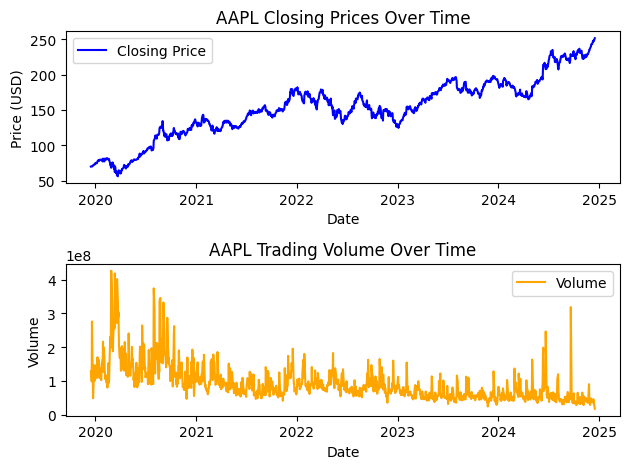

In [72]:
# Plotting closing price and volume in two subplots
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Close'], label='Closing Price', color='blue')
ax1.set_title('AAPL Closing Prices Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Volume'], label='Volume', color='orange')
ax2.set_title('AAPL Trading Volume Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend()

plt.tight_layout()
plt.show()


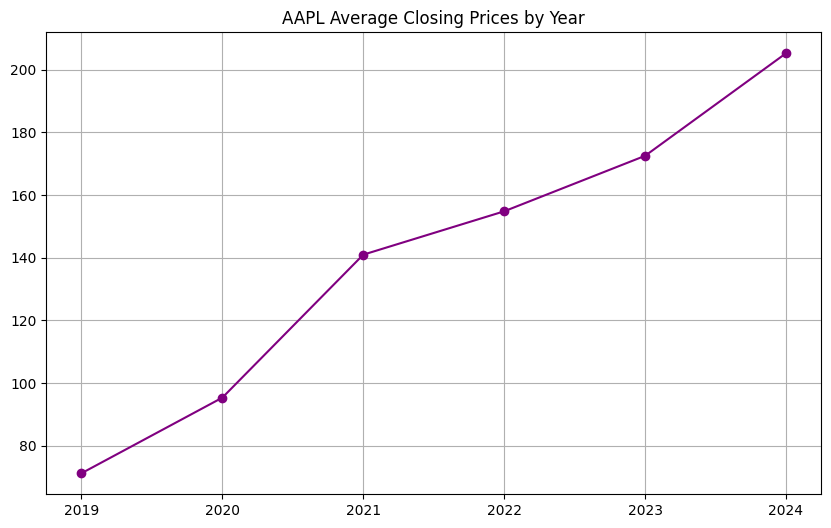

In [73]:
# 6. Check for seasonality by comparing yearly data
df['Year'] = df.index.year
yearly_data = df.groupby('Year')['Close'].mean()  # Calculate yearly average closing prices

plt.figure(figsize=(10, 6))
plt.plot(yearly_data, marker='o', linestyle='-', color='purple')
plt.title('AAPL Average Closing Prices by Year')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Percentage_Change')

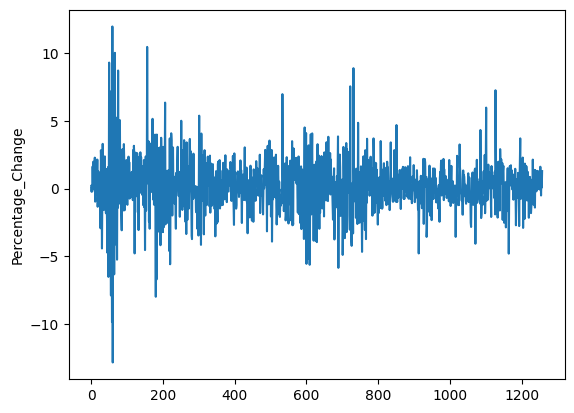

In [80]:
#using the close np array we calculated above to get the percentage chage
arr1=[]
for i in range(1259):
  if i==0:
    continue
  else:
    percentage=close[i]-close[i-1]
    percentage=percentage/close[i-1]
    percentage=percentage*100
    arr1=arr1+[percentage]
plt.plot(arr1)
plt.ylabel("Percentage_Change")

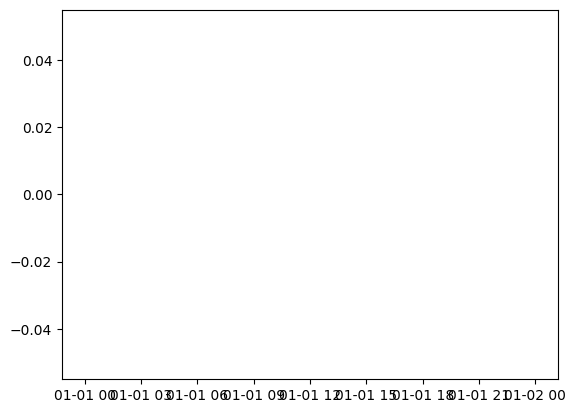

In [83]:
# using pandas
df['Pct_Change'] = df['Close'].pct_change() * 100
df.head()
#since the first row contains a NaN value under pct_change, i am removing the empty values
df = df.dropna()
plt.plot(df["Pct_Change"])